# Forecasting Models and Evaluation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from neuralprophet import NeuralProphet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
train_df = pd.read_csv("../data/train_data.csv")
test_df = pd.read_csv("../data/test_data.csv")

train_df["ds"] = pd.to_datetime(train_df["ds"])
test_df["ds"] = pd.to_datetime(test_df["ds"])

In [3]:
m_base = NeuralProphet()
m_base.fit(train_df, freq="D")

future = m_base.make_future_dataframe(train_df, periods=365)
forecast_base = m_base.predict(future)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
WARNING - (py.warni

Training: |                                                                                      | 0/? [00:00<…

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (35) is too small than the required number                     for the learning rate finder (226). The results might not be optimal.


Finding best initial lr:   0%|          | 0/226 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\utilities\data.py:79: UserWarning:

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 32. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


WARNING - (py.warnings._showwarnmsg) - C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\utilities\data.py:79: UserWarning:

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 8. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |                                                                                      | 0/? [00:00<…

WARNING - (py.warnings._showwarnmsg) - C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: |                                                                                    | 0/? [00:00<…

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [4]:
m_tuned = NeuralProphet(
    n_changepoints=20,
    yearly_seasonality=True,
    weekly_seasonality=True
)

m_tuned.fit(train_df, freq="D")
forecast_tuned = m_tuned.predict(future)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
WARNING - (py.warni

Training: |                                                                                      | 0/? [00:00<…

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (35) is too small than the required number                     for the learning rate finder (226). The results might not be optimal.


Finding best initial lr:   0%|          | 0/226 [00:00<?, ?it/s]

Training: |                                                                                      | 0/? [00:00<…

WARNING - (py.warnings._showwarnmsg) - C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined freque

Predicting: |                                                                                    | 0/? [00:00<…

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [5]:
sarimax_model = SARIMAX(
    train_df["y"],
    order=(1,1,1),
    seasonal_order=(1,1,1,7)
)

sarimax_fit = sarimax_model.fit(disp=False)
sarimax_forecast = sarimax_fit.forecast(steps=365)

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

y_true = test_df["y"].values

y_base = forecast_base.iloc[-365:]["yhat1"].values
y_tuned = forecast_tuned.iloc[-365:]["yhat1"].values
y_sarimax = sarimax_forecast.values

def metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))   # ✅ FIX
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, mape

mae_b, rmse_b, mape_b = metrics(y_true, y_base)
mae_t, rmse_t, mape_t = metrics(y_true, y_tuned)
mae_s, rmse_s, mape_s = metrics(y_true, y_sarimax)

metrics_df = pd.DataFrame({
    "Model": ["NeuralProphet Baseline", "NeuralProphet Tuned", "SARIMAX"],
    "MAE": [mae_b, mae_t, mae_s],
    "RMSE": [rmse_b, rmse_t, rmse_s],
    "MAPE (%)": [mape_b, mape_t, mape_s]
})

metrics_df

,Model,MAE,RMSE,MAPE (%)
0,NeuralProphet Baseline,4.032267,5.064617,2.215601
1,NeuralProphet Tuned,4.345963,5.497798,2.371166
2,SARIMAX,13.688137,15.636715,7.516043


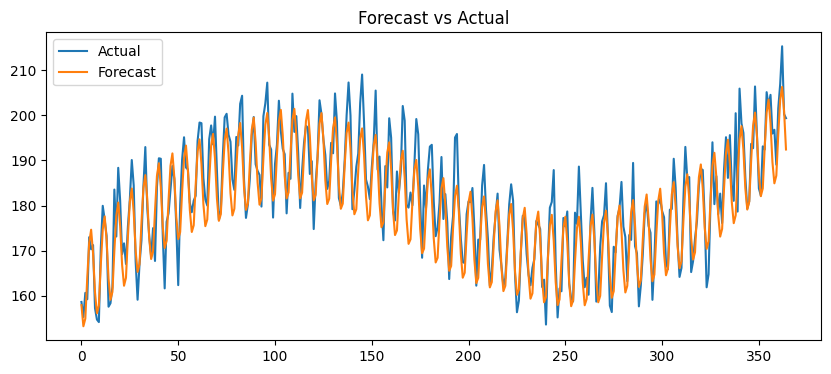

In [8]:
os.makedirs("../outputs", exist_ok=True)

metrics_df.to_csv("../outputs/metrics.csv", index=False)

plt.figure(figsize=(10,4))
plt.plot(y_true, label="Actual")
plt.plot(y_tuned, label="Forecast")
plt.legend()
plt.title("Forecast vs Actual")
plt.savefig("../outputs/forecast.png")
plt.show()

In [9]:
m_tuned.plot_components(forecast_tuned)

WARNING - (py.warnings._showwarnmsg) - C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\plot_forecast_plotly.py:283: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\neuralprophet\plot_forecast_plotly.py:410: FutureWarning:

The b

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': '55893ee4-1a2c-474d-b1ce-e64f84d74474',
              'x': array(['2021-01-01T00:00:00.000000000', '2021-01-02T00:00:00.000000000',
                          '2021-01-03T00:00:00.000000000', ..., '2021-12-29T00:00:00.000000000',
                          '2021-12-30T00:00:00.000000000', '2021-12-31T00:00:00.000000000'],
                         dtype='datetime64[ns]'),
              'xaxis': 'x',
              'y': {'bdata': ('L7ghQ7zQIUNI6SFD1AEiQ2IaIkPuMi' ... 'RDCz5EQ5hWREMlb0RDsodEQz6gREM='),
                    'dtype': 'f4'},
              'yaxis': 'y'},
             {'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'yearly seasonality',
              'showlegend': False,
              'type': 'scatter',
   